--> Let's assume that there is a jail and there is a guard. on 1st Jan , Suresh works there and next day, Ramesh works as guard. They work alternate days. Today is 12th Jan. Who is guarding today?

In [1]:
guard = 'Ramesh'
guard

'Ramesh'

In [2]:
print(guard)

Ramesh


--> Who guards tomorrow?

In [3]:
guard = 'Suresh'
print(guard)

Suresh


--> Who guards on 20th? 

In [4]:
date = 20
if(date / 2 == 0):
    guard = 'Ramesh'
else:
    guard = 'Suresh'
print(guard)    

Suresh


--> Above works for Jan but what happens next month? after 31st jan, ...
Let's better write a function first and then see further...

In [5]:
def getGuard(date):
    if(date / 2 == 0):
        guard = 'Ramesh'
    else:
        guard = 'Suresh'
    print(guard)
getGuard(20)

Suresh


In [6]:
from datetime import date
print(date(2020,2,20))
today = date(2020,2,20)
print(today.day,today.month,today.year)
start = date(2020,1,1)

diff= today-start
print(diff.days+1)

2020-02-20
20 2 2020
51


In [7]:
def getGuard(dat,month,year):
    print(year,month,dat)
    today = date(year,month,dat)
    start = date(year,1,1)
    diff= (today-start).days+1
    if(diff / 2 == 0):
        guard = 'Ramesh'
    else:
        guard = 'Suresh'
    print(guard)
getGuard(20,1,2020)

2020 1 20
Suresh


--> In same Jail kitchen, Meena and Teena are cooks.
Meena cooks Biryani, Pulav, SambharRice and CurdRice alternate days and comes alternate days; 
Teena cooks Dosa, Vada, Poha and Idly alternate days and comes alternate days;

Can you write a code to get what will be cooked today given date?

In [8]:
def getFood(dat,month,year):
    teenaFoods = ['Dosa', 'Vada', 'Poha', 'Idly']
    meenaFoods = ['Biryani', 'Pulav', 'SambharRice', 'CurdRice']
    print(year,month,dat)
    today = date(year,month,dat)
    start = date(year,1,1)
    diff = (today-start).days+1
    diff = diff%8 
    if(diff % 2 == 0):
        food = meenaFoods[diff // 2]
    else:
        food = teenaFoods[diff // 2]
    print(food)

for i in range(1,11):
    print()
    getFood(i,1,2020)


2020 1 1
Dosa

2020 1 2
Pulav

2020 1 3
Vada

2020 1 4
SambharRice

2020 1 5
Poha

2020 1 6
CurdRice

2020 1 7
Idly

2020 1 8
Biryani

2020 1 9
Dosa

2020 1 10
Pulav


--> Can we do above with numpy???

In [9]:
import numpy as np
def getFood(dat,month,year):
    teenaFoods = np.array(['Dosa', 'Vada', 'Poha', 'Idly'])
    meenaFoods = np.array(['Biryani', 'Pulav', 'SambharRice', 'CurdRice'])
    print(year,month,dat)
    today = date(year,month,dat)
    start = date(year,1,1)
    diff = (today-start).days+1
    diff = diff%8 
    if(diff % 2 == 0):
        food = meenaFoods[diff // 2]
    else:
        food = teenaFoods[diff // 2]
    print(food)

for i in range(1,11):
    print()
    getFood(i,1,2020)


2020 1 1
Dosa

2020 1 2
Pulav

2020 1 3
Vada

2020 1 4
SambharRice

2020 1 5
Poha

2020 1 6
CurdRice

2020 1 7
Idly

2020 1 8
Biryani

2020 1 9
Dosa

2020 1 10
Pulav


--> Is above really extendable if more cooks are added? What if more dishes are there?
Let's convert it to multidimentional array

In [10]:
teenaFoods = np.array(['Dosa', 'Vada', 'Poha', 'Idly'])
meenaFoods = np.array(['Biryani', 'Pulav', 'SambharRice', 'CurdRice'])

foods = np.array([meenaFoods,teenaFoods])
print(foods)
print(foods[0])
print(foods[0][1])

[['Biryani' 'Pulav' 'SambharRice' 'CurdRice']
 ['Dosa' 'Vada' 'Poha' 'Idly']]
['Biryani' 'Pulav' 'SambharRice' 'CurdRice']
Pulav


In [11]:
def getFood(dat,month,year):
    teenaFoods = np.array(['Dosa', 'Vada', 'Poha', 'Idly'])
    meenaFoods = np.array(['Biryani', 'Pulav', 'SambharRice', 'CurdRice'])
    foods = np.array([meenaFoods,teenaFoods])
    today = date(year,month,dat)
    start = date(year,1,1)
    diff = (today-start).days+1
    diff = diff%8 
    food = foods[(int)(diff % 2 != 0)][diff // 2]
    return food

for i in range(1,11):
    print(getFood(i,1,2020))


Dosa
Pulav
Vada
SambharRice
Poha
CurdRice
Idly
Biryani
Dosa
Pulav


--> Can we have a list of what people eat in first 20 days of Jan

In [12]:
foods = np.array([])
for i in range(1,21):
    foods = np.append(foods,getFood(i,1,2020))
print(foods)
print(foods.shape)

['Dosa' 'Pulav' 'Vada' 'SambharRice' 'Poha' 'CurdRice' 'Idly' 'Biryani'
 'Dosa' 'Pulav' 'Vada' 'SambharRice' 'Poha' 'CurdRice' 'Idly' 'Biryani'
 'Dosa' 'Pulav' 'Vada' 'SambharRice']
(20,)


--> Can you please arrange it by cook?

In [13]:
foodsnd = foods.reshape(2,10)

In [14]:
foods.reshape(2,10).transpose()

array([['Dosa', 'Vada'],
       ['Pulav', 'SambharRice'],
       ['Vada', 'Poha'],
       ['SambharRice', 'CurdRice'],
       ['Poha', 'Idly'],
       ['CurdRice', 'Biryani'],
       ['Idly', 'Dosa'],
       ['Biryani', 'Pulav'],
       ['Dosa', 'Vada'],
       ['Pulav', 'SambharRice']], dtype='<U32')

In [15]:
tfs = np.array([])
for food in foods:
    if(np.isin(food,teenaFoods)):
        tfs = np.append(tfs,food)
print(tfs)

['Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada']


In [16]:
tfs = [food for food in foods if np.isin(food,teenaFoods) ]
tfs

['Dosa',
 'Vada',
 'Poha',
 'Idly',
 'Dosa',
 'Vada',
 'Poha',
 'Idly',
 'Dosa',
 'Vada']

In [17]:
mfs = [food for food in foods if np.isin(food,meenaFoods) ]
mfs

['Pulav',
 'SambharRice',
 'CurdRice',
 'Biryani',
 'Pulav',
 'SambharRice',
 'CurdRice',
 'Biryani',
 'Pulav',
 'SambharRice']

--> What are different food options available in this Jail? How can you merge values of dishes from different cooks?

In [18]:
np.unique(foods)

array(['Biryani', 'CurdRice', 'Dosa', 'Idly', 'Poha', 'Pulav',
       'SambharRice', 'Vada'], dtype='<U32')

In [19]:
print(np.hstack([tfs,mfs]))
print(np.vstack([tfs,mfs]))
print(np.concatenate((tfs,mfs)))

['Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada'
 'Pulav' 'SambharRice' 'CurdRice' 'Biryani' 'Pulav' 'SambharRice'
 'CurdRice' 'Biryani' 'Pulav' 'SambharRice']
[['Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada']
 ['Pulav' 'SambharRice' 'CurdRice' 'Biryani' 'Pulav' 'SambharRice'
  'CurdRice' 'Biryani' 'Pulav' 'SambharRice']]
['Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada' 'Poha' 'Idly' 'Dosa' 'Vada'
 'Pulav' 'SambharRice' 'CurdRice' 'Biryani' 'Pulav' 'SambharRice'
 'CurdRice' 'Biryani' 'Pulav' 'SambharRice']


--> Now imagine that both guards get 100Rs and cook as 200rs as salary every day...
can we have a representation of their salaries?

In [20]:
salaries = {'Suresh':100,'Ramesh':100,'Teena':200,'Meena':200}

In [21]:
salaries['Suresh']

100

In [22]:
for key,val in salaries.items():
    print(key,val)

Suresh 100
Ramesh 100
Teena 200
Meena 200


In [23]:
for key in salaries:
    print(key)
    print(key,salaries[key])
for val in salaries.values():
    print(val)

Suresh
Suresh 100
Ramesh
Ramesh 100
Teena
Teena 200
Meena
Meena 200
100
100
200
200



PANDAS
------------------------------------------

In [24]:
import pandas as pd

In [25]:
pd.DataFrame({'No':[1,2,3],'Yes':[4,5,6]})

,No,Yes
0,1,4
1,2,5
2,3,6


In [26]:
pd.DataFrame({'Cities':['Hyd','Del','Mum'],'Population':[112,223,345]})

,Cities,Population
0,Hyd,112
1,Del,223
2,Mum,345


In [27]:
pd.DataFrame({'Cities':['Hyd','Del','Mum'],'Population':[112,223,345]},index=['row1','row2','row3'])

,Cities,Population
row1,Hyd,112
row2,Del,223
row3,Mum,345


In [28]:
pd.Series(['Hyd','Del','Mum'])

0    Hyd
1    Del
2    Mum
dtype: object

In [29]:
pd.Series(['Hyd','Del','Mum'],index=['row1','row2','row3'])

row1    Hyd
row2    Del
row3    Mum
dtype: object

In [30]:
wine_reviews = pd.read_csv("winemag-data-130k-v2.csv")

In [31]:
wine_reviews.shape

(129971, 14)

In [32]:
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [33]:
wine_reviews.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [34]:
wine_reviews.country

0               Italy
1            Portugal
2                  US
3                  US
4                  US
5               Spain
6               Italy
7              France
8             Germany
9              France
10                 US
11             France
12                 US
13              Italy
14                 US
15            Germany
16          Argentina
17          Argentina
18              Spain
19                 US
20                 US
21                 US
22              Italy
23                 US
24              Italy
25                 US
26              Italy
27              Italy
28              Italy
29                 US
             ...     
129941             US
129942             US
129943          Italy
129944         Israel
129945             US
129946        Germany
129947          Italy
129948      Argentina
129949             US
129950             US
129951         France
129952             US
129953    New Zealand
129954    New Zealand
129955    

In [35]:
wine_reviews['country']

0               Italy
1            Portugal
2                  US
3                  US
4                  US
5               Spain
6               Italy
7              France
8             Germany
9              France
10                 US
11             France
12                 US
13              Italy
14                 US
15            Germany
16          Argentina
17          Argentina
18              Spain
19                 US
20                 US
21                 US
22              Italy
23                 US
24              Italy
25                 US
26              Italy
27              Italy
28              Italy
29                 US
             ...     
129941             US
129942             US
129943          Italy
129944         Israel
129945             US
129946        Germany
129947          Italy
129948      Argentina
129949             US
129950             US
129951         France
129952             US
129953    New Zealand
129954    New Zealand
129955    

In [36]:
wine_reviews['country'][0]

'Italy'

In [37]:
wine_reviews.iloc[0]

Unnamed: 0                                                               0
country                                                              Italy
description              Aromas include tropical fruit, broom, brimston...
designation                                                   Vulkà Bianco
points                                                                  87
price                                                                  NaN
province                                                 Sicily & Sardinia
region_1                                                              Etna
region_2                                                               NaN
taster_name                                                  Kerin O’Keefe
taster_twitter_handle                                         @kerinokeefe
title                                    Nicosia 2013 Vulkà Bianco  (Etna)
variety                                                        White Blend
winery                   

In [38]:
wine_reviews.iloc[:,0]

0              0
1              1
2              2
3              3
4              4
5              5
6              6
7              7
8              8
9              9
10            10
11            11
12            12
13            13
14            14
15            15
16            16
17            17
18            18
19            19
20            20
21            21
22            22
23            23
24            24
25            25
26            26
27            27
28            28
29            29
           ...  
129941    129941
129942    129942
129943    129943
129944    129944
129945    129945
129946    129946
129947    129947
129948    129948
129949    129949
129950    129950
129951    129951
129952    129952
129953    129953
129954    129954
129955    129955
129956    129956
129957    129957
129958    129958
129959    129959
129960    129960
129961    129961
129962    129962
129963    129963
129964    129964
129965    129965
129966    129966
129967    129967
129968    1299

In [39]:
wine_reviews.iloc[1:3,0]

1    1
2    2
Name: Unnamed: 0, dtype: int64

In [40]:
reviews = wine_reviews
reviews.loc[(reviews.country == 'Italy') | (reviews.points >= 90)]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
22,22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto
24,24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì
26,26,Italy,Pretty aromas of yellow flower and stone fruit...,Dalila,87,13.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Dalila White (Terre Siciliane),White Blend,Stemmari
27,27,Italy,"Aromas recall ripe dark berry, toast and a whi...",NaN,87,10.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Nero d'Avola (Terre Siciliane),Nero d'Avola,Stemmari
28,28,Italy,"Aromas suggest mature berry, scorched earth, a...",Mascaria Barricato,87,17.0,Sicily & Sardinia,Cerasuolo di Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2011 Mascaria Barricato (Cera...,Red Blend,Terre di Giurfo
31,31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta


In [41]:
reviews.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [42]:
reviews.points.mean()

88.44713820775404

In [43]:
reviews.taster_name.unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [44]:
reviews.groupby('points').points.count()

points
80       397
81       692
82      1836
83      3025
84      6480
85      9530
86     12600
87     16933
88     17207
89     12226
90     15410
91     11359
92      9613
93      6489
94      3758
95      1535
96       523
97       229
98        77
99        33
100       19
Name: points, dtype: int64

In [45]:
reviews.groupby('points').price.min()

points
80      5.0
81      5.0
82      4.0
83      4.0
84      4.0
85      4.0
86      4.0
87      5.0
88      6.0
89      7.0
90      8.0
91      7.0
92     11.0
93     12.0
94     13.0
95     20.0
96     20.0
97     35.0
98     50.0
99     44.0
100    80.0
Name: price, dtype: float64

In [46]:
reviews[pd.isnull(reviews.country)]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
11150,11150,NaN,"A blend of 85% Melnik, 10% Grenache Noir and 5...",NaN,89,20.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Melnik,Melnik,Orbelus
11348,11348,NaN,"Light and fruity, this is a wine that has some...",Partager,82,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager White,White Blend,Barton & Guestier
14030,14030,NaN,"This Furmint, grown in marl soils, has aromas ...",Márga,88,25.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,St. Donat 2013 Márga White,White Blend,St. Donat
16000,16000,NaN,"Jumpy, jammy aromas of foxy black fruits are s...",Valle de los Manantiales Vineyard,86,40.0,NaN,NaN,NaN,Michael Schachner,@wineschach,Familia Deicas 2015 Valle de los Manantiales V...,Tannat,Familia Deicas
16749,16749,NaN,Winemaker: Bartho Eksteen. This wooded Sauvy s...,Cape Winemakers Guild Vloekskoot Wooded,91,NaN,NaN,NaN,NaN,Lauren Buzzeo,@laurbuzz,Bartho Eksteen 2016 Cape Winemakers Guild Vloe...,Sauvignon Blanc,Bartho Eksteen


In [47]:
reviews.region_2.fillna("Unknown")

0                   Unknown
1                   Unknown
2         Willamette Valley
3                   Unknown
4         Willamette Valley
5                   Unknown
6                   Unknown
7                   Unknown
8                   Unknown
9                   Unknown
10                     Napa
11                  Unknown
12                   Sonoma
13                  Unknown
14            Central Coast
15                  Unknown
16                  Unknown
17                  Unknown
18                  Unknown
19                  Unknown
20                  Unknown
21             Oregon Other
22                  Unknown
23            Central Coast
24                  Unknown
25                   Sonoma
26                  Unknown
27                  Unknown
28                  Unknown
29           Central Valley
                ...        
129941              Unknown
129942               Sonoma
129943              Unknown
129944              Unknown
129945        Centra

____________________

MATPLOTLIB 
__________________________

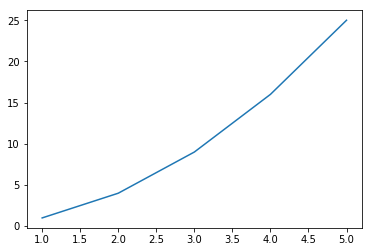

In [79]:
X = [1,2,3,4,5]
Y = [1,4,9,16,25]
plt.plot(X,Y)

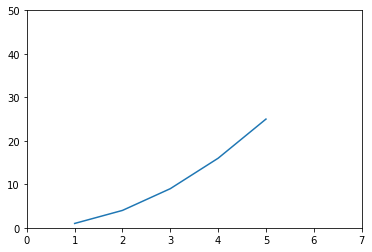

In [82]:
X = [1,2,3,4,5]
Y = [1,4,9,16,25]
plt.plot(X,Y)
plt.axis([0,7,0,50])
plt.show()

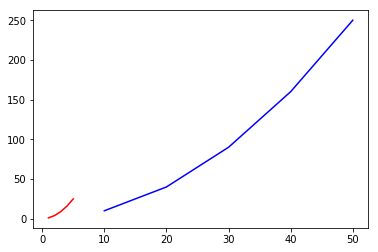

In [84]:
X = [1,2,3,4,5]
Y = [1,4,9,16,25]
X1 = [10,20,30,40,50]
Y1 = [10,40,90,160,250]

plt.plot(X,Y,'r',X1,Y1,'b')

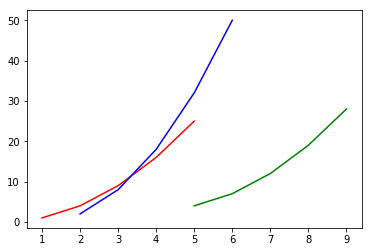

In [89]:
X = [1,2,3,4,5]
Y = [1,4,9,16,25]
X1 = np.array(X) + 1
Y1 = np.array(Y) * 2

plt.plot(X,Y,'r')
plt.plot(X1,Y1,'b')
plt.plot(np.array(X) + 4,np.array(X)**2 + 3,'g')

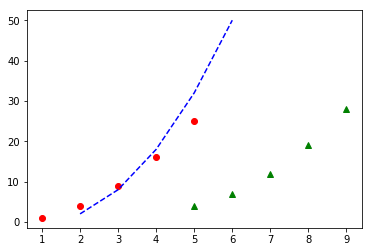

In [90]:
X = [1,2,3,4,5]
Y = [1,4,9,16,25]
X1 = np.array(X) + 1
Y1 = np.array(Y) * 2

plt.plot(X,Y,'ro')
plt.plot(X1,Y1,'b--')
plt.plot(np.array(X) + 4,np.array(X)**2 + 3,'g^')

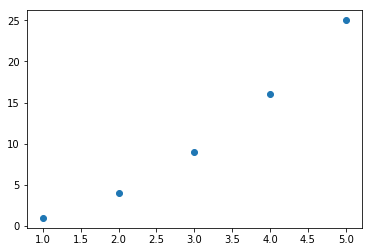

In [92]:
plt.scatter(X,Y)

In [94]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

pd.DataFrame(data)

,a,b,c,d
0,0,-11.743151,35,186.264870
1,1,-5.362663,18,76.042320
2,2,5.022551,47,232.551716
3,3,-3.871072,0,17.458669
4,4,-2.181262,1,62.723891
5,5,5.250155,27,145.341581
6,6,11.608441,32,26.101022
7,7,3.952717,16,77.371033
8,8,5.286991,46,1.662604
9,9,-7.032956,48,9.028709


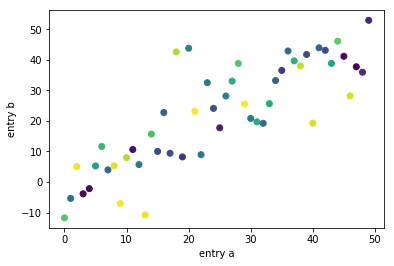

In [98]:
plt.scatter('a', 'b', c='c', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

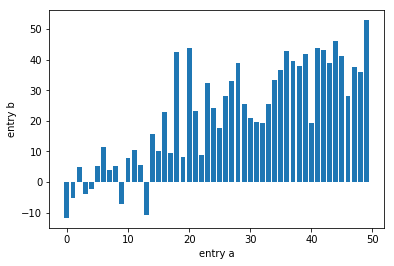

In [100]:
plt.bar('a', 'b', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

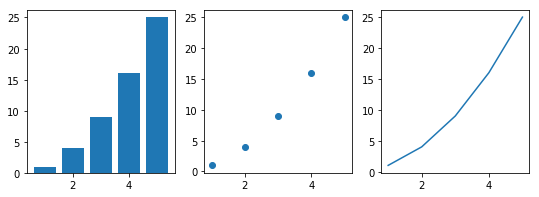

In [106]:
plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(X, Y)
plt.subplot(132)
plt.scatter(X, Y)
plt.subplot(133)
plt.plot(X, Y)
plt.show()